In [5]:
#libraries for plotting histogram
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt1
import string
import nltk
from nltk.corpus import stopwords

import numpy as np
#import plotly.plotly as py
from sklearn.datasets import fetch_20newsgroups #importing dataset
from sklearn.feature_extraction import text
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from collections import defaultdict
from collections import Counter
from nltk.stem.snowball import SnowballStemmer
import string
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import re
from sklearn.metrics.cluster import contingency_matrix

#LSI
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF

#metrics, accuracy, roc and confusion matrix

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn import metrics
import itertools

#cross validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn import metrics

from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
from sklearn.random_projection import sparse_random_matrix
from sklearn import preprocessing

In [6]:
all_categories = ['comp.graphics','comp.os.ms-windows.misc','comp.sys.ibm.pc.hardware','comp.sys.mac.hardware',
              'rec.autos','rec.motorcycles','rec.sport.baseball','rec.sport.hockey']
all_classes = ['Computer Technology','Recreational Activity']
twenty_train = fetch_20newsgroups(subset='all', categories=all_categories, shuffle=True, random_state=42, remove=('headers', 'footers', 'quotes'))
twenty_test =fetch_20newsgroups(subset='test', categories=all_categories, shuffle=True, random_state=42, remove=('headers', 'footers', 'quotes'))

print(type(twenty_train.target))

target_data = []
target_test_data = []

i=0
j=0

while(i<len(twenty_train.target)):
    if((twenty_train.target[i]>=4)):
       target_data.append(1)
    else:
       target_data.append(0)
    i=i+1
    
while(j<len(twenty_test.target)):
    if((twenty_test.target[j]>=4)):
       target_test_data.append(1)
    else:
       target_test_data.append(0)
    j=j+1

<class 'numpy.ndarray'>


In [7]:
# QUESTION 1
# For getting TFIDF matrix and printing its dimensions
final_token = CountVectorizer(analyzer = 'word',stop_words = 'english',min_df = 3)
count_of_words = final_token.fit_transform(twenty_train.data)
print("Dimensions of Numerical feature vector for training data: "+ str(count_of_words.shape))
print ("Number of terms Extracted for training data: " + str(count_of_words.shape[1]))
#TF-IDF Matrix for min_df=2
vectorizer = TfidfTransformer()
vectors = vectorizer.fit_transform(count_of_words)
size=vectors.shape
print("Dimensions of TF-IDF vector"+ str(size))

Dimensions of Numerical feature vector for training data: (7882, 18469)
Number of terms Extracted for training data: 18469
Dimensions of TF-IDF vector(7882, 18469)


In [10]:
# QUESTION 2
#Calulate adjusted mutual info
km = KMeans(n_clusters=2, init='k-means++', max_iter=100, n_init=1,
                verbose=0)
cluster_target_data = km.fit(vectors)
print()
print('Contingency Matrix:')
print(contingency_matrix(target_data, km.labels_, eps=None, sparse=False))
print("Homogeneity: %0.3f" % metrics.homogeneity_score(target_data, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(target_data, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(target_data, km.labels_))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(target_data, km.labels_))
print("Adjusted Mutual-Index: %.3f"% metrics.adjusted_mutual_info_score(target_data, km.labels_))
print()



Contingency Matrix:
[[1320 2583]
 [3947   32]]
Homogeneity: 0.426
Completeness: 0.464
V-measure: 0.444
Adjusted Rand-Index: 0.432
Adjusted Mutual-Index: 0.426



(1000,)


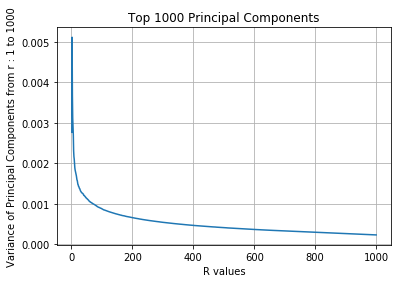

In [11]:
# QUESTION 3 a (i)
svd = TruncatedSVD(n_components=1000, random_state=42)
svd.fit(vectors)

a=[]
a = svd.explained_variance_
print(a.shape)

t = np.arange(1,1001)
plt.plot(t, a)
plt.xlabel('R values')
plt.ylabel('Variance of Principal Components from r : 1 to 1000')
plt.title('Top 1000 Principal Components')
plt.grid(True)
plt.show()





Metrices for r=1
Contingency Matrix:
[[1690 2213]
 [2856 1123]]
Homogeneity: 0.061
Completeness: 0.062
V-measure: 0.061
Adjusted Rand-Index: 0.082
Adjusted Mutual-Index: 0.061


Metrices for r=2
Contingency Matrix:
[[2619 1284]
 [  59 3920]]
Homogeneity: 0.416
Completeness: 0.450
V-measure: 0.432
Adjusted Rand-Index: 0.435
Adjusted Mutual-Index: 0.416


Metrices for r=3
Contingency Matrix:
[[1316 2587]
 [3922   57]]
Homogeneity: 0.409
Completeness: 0.445
V-measure: 0.426
Adjusted Rand-Index: 0.425
Adjusted Mutual-Index: 0.409


Metrices for r=5
Contingency Matrix:
[[1447 2456]
 [3956   23]]
Homogeneity: 0.401
Completeness: 0.447
V-measure: 0.423
Adjusted Rand-Index: 0.393
Adjusted Mutual-Index: 0.401


Metrices for r=10
Contingency Matrix:
[[2566 1337]
 [  38 3941]]
Homogeneity: 0.417
Completeness: 0.455
V-measure: 0.435
Adjusted Rand-Index: 0.424
Adjusted Mutual-Index: 0.417


Metrices for r=20
Contingency Matrix:
[[3899    4]
 [2690 1289]]
Homogeneity: 0.179
Completeness: 0.279
V-m

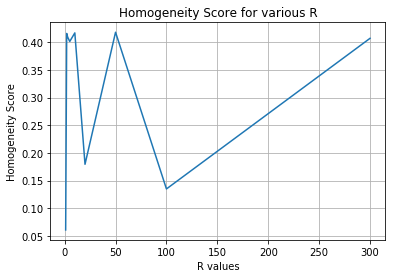

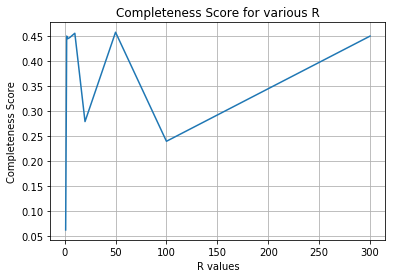

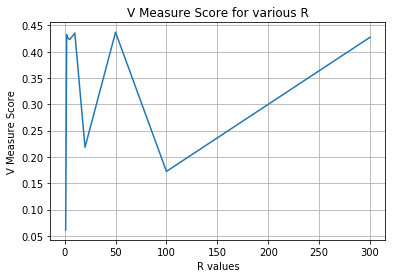

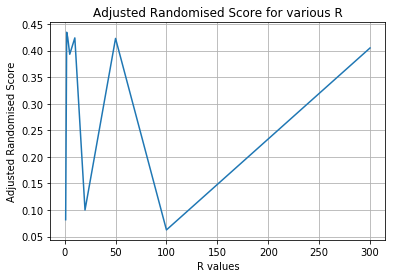

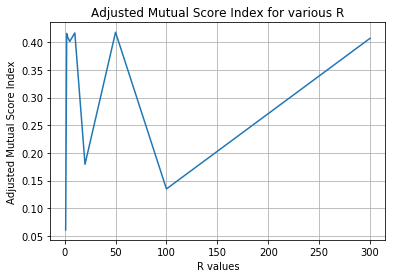

In [12]:
# QUESTION 3 a (i)

# Finding best r value with LSI
r=[1, 2, 3, 5, 10, 20, 50, 100, 300]
hs=[]
cs=[]
vms=[]
ars=[]
amis=[]
for s in r:
    svd = TruncatedSVD(n_components=s, random_state=42)
    LSI_transformed_tfidf = svd.fit_transform(vectors)
    km = KMeans(n_clusters=2, init='k-means++', max_iter=100, n_init=1,
                verbose=0)
    km.fit(LSI_transformed_tfidf)
    print()
    print()
    hs.append(metrics.homogeneity_score(target_data, km.labels_))
    cs.append(metrics.completeness_score(target_data, km.labels_))
    vms.append(metrics.v_measure_score(target_data, km.labels_))
    ars.append( metrics.adjusted_rand_score(target_data, km.labels_))
    amis.append(metrics.adjusted_mutual_info_score(target_data, km.labels_))
    print("Metrices for r="+ str(s))
    print('Contingency Matrix:')
    print(contingency_matrix(target_data, km.labels_, eps=None, sparse=False))
    print("Homogeneity: %0.3f" % metrics.homogeneity_score(target_data, km.labels_))
    print("Completeness: %0.3f" % metrics.completeness_score(target_data, km.labels_))
    print("V-measure: %0.3f" % metrics.v_measure_score(target_data, km.labels_))
    print("Adjusted Rand-Index: %.3f"% metrics.adjusted_rand_score(target_data, km.labels_))
    print("Adjusted Mutual-Index: %.3f"% metrics.adjusted_mutual_info_score(target_data, km.labels_))

print()
print("========================SVD Truncated Data for various R=============================")    
    
print()
print()
                
plt.plot(r, hs)
plt.xlabel('R values')
plt.ylabel('Homogeneity Score')
plt.title('Homogeneity Score for various R')
plt.grid(True)
plt.show()
    
plt.plot(r, cs)
plt.xlabel('R values')
plt.ylabel('Completeness Score')
plt.title('Completeness Score for various R')
plt.grid(True)
plt.show()

plt.plot(r, vms)
plt.xlabel('R values')
plt.ylabel('V Measure Score')
plt.title('V Measure Score for various R')
plt.grid(True)
plt.show()

plt.plot(r, ars)
plt.xlabel('R values')
plt.ylabel('Adjusted Randomised Score')
plt.title('Adjusted Randomised Score for various R')
plt.grid(True)
plt.show()

plt.plot(r, amis)
plt.xlabel('R values')
plt.ylabel('Adjusted Mutual Score Index')
plt.title('Adjusted Mutual Score Index for various R')
plt.grid(True)
plt.show()
   



Metrics for r = 1
Contingency Matrix:
[[2225 1678]
 [1139 2840]]
Homogeneity: 0.060
Completeness: 0.061
V-measure: 0.061
Adjusted Rand-Index: 0.081
Adjusted Mutual-Index: 0.060


Metrics for r = 2
Contingency Matrix:
[[3633  270]
 [ 793 3186]]
Homogeneity: 0.446
Completeness: 0.451
V-measure: 0.448
Adjusted Rand-Index: 0.533
Adjusted Mutual-Index: 0.446


Metrics for r = 3
Contingency Matrix:
[[3531  372]
 [ 640 3339]]
Homogeneity: 0.452
Completeness: 0.453
V-measure: 0.452
Adjusted Rand-Index: 0.552
Adjusted Mutual-Index: 0.452


Metrics for r = 5
Contingency Matrix:
[[3900    3]
 [2765 1214]]
Homogeneity: 0.168
Completeness: 0.271
V-measure: 0.208
Adjusted Rand-Index: 0.088
Adjusted Mutual-Index: 0.168


Metrics for r = 10
Contingency Matrix:
[[3405  498]
 [3976    3]]
Homogeneity: 0.064
Completeness: 0.188
V-measure: 0.096
Adjusted Rand-Index: 0.018
Adjusted Mutual-Index: 0.064


Metrics for r = 20
Contingency Matrix:
[[1208 2695]
 [3918   61]]
Homogeneity: 0.434
Completeness: 0.4

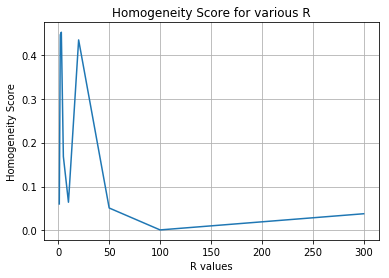

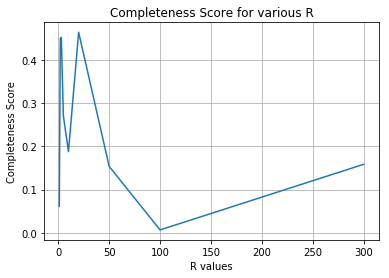

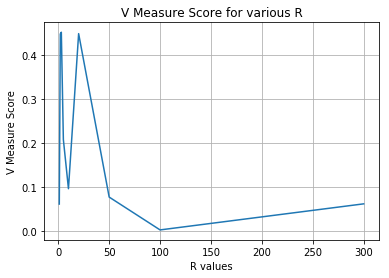

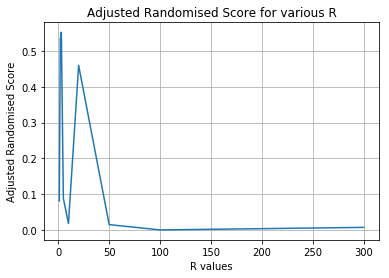

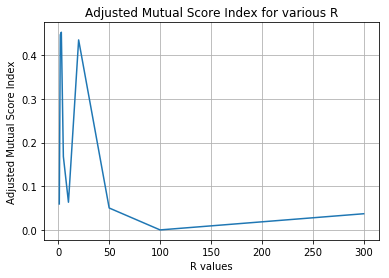

In [14]:
# QUESTION 3 a (i)

# Finding best r value with NMF
r=[1, 2, 3, 5, 10, 20, 50, 100, 300]
hs=[]
cs=[]
vms=[]
ars=[]
amis=[]
for s in r:
    nmf = NMF(n_components=s, random_state=42)
    NMF_transformed_tfidf = nmf.fit_transform(vectors)
    km = KMeans(n_clusters=2, init='k-means++', max_iter=100, n_init=1,
                verbose=0)
    km.fit(NMF_transformed_tfidf)
    print()
    print()
    hs.append(metrics.homogeneity_score(target_data, km.labels_))
    cs.append(metrics.completeness_score(target_data, km.labels_))
    vms.append(metrics.v_measure_score(target_data, km.labels_))
    ars.append( metrics.adjusted_rand_score(target_data, km.labels_))
    amis.append(metrics.adjusted_mutual_info_score(target_data, km.labels_))
    print("Metrics for r = "+str(s))
    print('Contingency Matrix:')
    print(contingency_matrix(target_data, km.labels_, eps=None, sparse=False))
    print("Homogeneity: %0.3f" % metrics.homogeneity_score(target_data, km.labels_))
    print("Completeness: %0.3f" % metrics.completeness_score(target_data, km.labels_))
    print("V-measure: %0.3f" % metrics.v_measure_score(target_data, km.labels_))
    print("Adjusted Rand-Index: %.3f"% metrics.adjusted_rand_score(target_data, km.labels_))
    print("Adjusted Mutual-Index: %.3f"% metrics.adjusted_mutual_info_score(target_data, km.labels_))


print("========================NMF Truncated Data for various R=============================")    
    
print()
print()
                
plt.plot(r, hs)
plt.xlabel('R values')
plt.ylabel('Homogeneity Score')
plt.title('Homogeneity Score for various R')
plt.grid(True)
plt.show()
    
plt.plot(r, cs)
plt.xlabel('R values')
plt.ylabel('Completeness Score')
plt.title('Completeness Score for various R')
plt.grid(True)
plt.show()

plt.plot(r, vms)
plt.xlabel('R values')
plt.ylabel('V Measure Score')
plt.title('V Measure Score for various R')
plt.grid(True)
plt.show()

plt.plot(r, ars)
plt.xlabel('R values')
plt.ylabel('Adjusted Randomised Score')
plt.title('Adjusted Randomised Score for various R')
plt.grid(True)
plt.show()

plt.plot(r, amis)
plt.xlabel('R values')
plt.ylabel('Adjusted Mutual Score Index')
plt.title('Adjusted Mutual Score Index for various R')
plt.grid(True)
plt.show()


===== Visualization of K-Means clustering for 2 clusters using r = 2 obtained in LSI ======


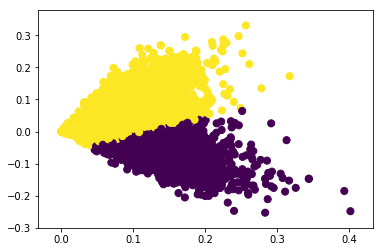



===== Visualization of K-Means clustering for 2 clusters using r = 3 obtained in NMF ======


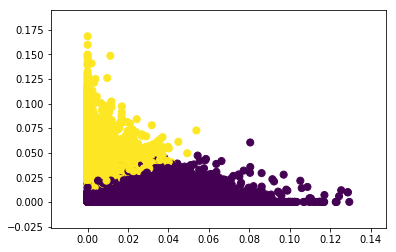

In [16]:
# QUESTION 4 (a)

print('===== Visualization of K-Means clustering for 2 clusters using r = 2 obtained in LSI ======')
km = KMeans(n_clusters=2, init='k-means++', max_iter=100, n_init=1,
                verbose=0)
svd = TruncatedSVD(n_components=2, random_state=42)
LSI_transformed_tfidf = svd.fit_transform(vectors)
y_kmeans = km.fit_predict(LSI_transformed_tfidf)
plt.scatter(LSI_transformed_tfidf[:, 0], LSI_transformed_tfidf[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.show()

print()
print()

print('===== Visualization of K-Means clustering for 2 clusters using r = 3 obtained in NMF ======')
km = KMeans(n_clusters=2, init='k-means++', max_iter=100, n_init=1,
                verbose=0)
nmf = NMF(n_components=3, random_state=42)
NMF_transformed_tfidf = nmf.fit_transform(vectors)
y_kmeans = km.fit_predict(NMF_transformed_tfidf)
plt.scatter(NMF_transformed_tfidf[:, 0], NMF_transformed_tfidf[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.show()

======= Normalizing data for r = 2 with LSI =======
Metrics for r = 2
Contingency Matrix:
[[2620 1283]
 [  59 3920]]
Homogeneity: 0.416
Completeness: 0.450
V-measure: 0.432
Adjusted Rand-Index: 0.435
Adjusted Mutual-Index: 0.416



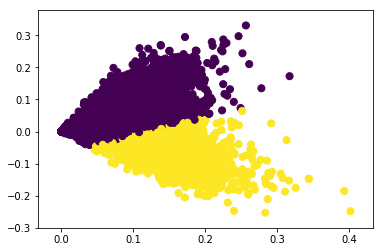



======= Normalizing data for r = 3 with NMF =======
Metrics for r = 3
Contingency Matrix:
[[ 954 2949]
 [3862  117]]
Homogeneity: 0.470
Completeness: 0.488
V-measure: 0.479
Adjusted Rand-Index: 0.530
Adjusted Mutual-Index: 0.470



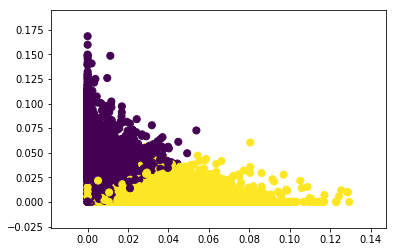

In [18]:
# QUESTION 4 (b)

print("======= Normalizing data for r = 2 with LSI =======")
scaled_vectors = preprocessing.normalize(vectors, norm='l2', axis=1, copy=True, return_norm=False)
km = KMeans(n_clusters=2, init='k-means++', max_iter=100, n_init=1,
                verbose=0)
svd = TruncatedSVD(n_components=2, random_state=42)
LSI_transformed_tfidf_scaled = svd.fit_transform(scaled_vectors)
a1 = km.fit(LSI_transformed_tfidf_scaled)
print("Metrics for r = 2")
print('Contingency Matrix:')
print(contingency_matrix(target_data, a1.labels_, eps=None, sparse=False))
print("Homogeneity: %0.3f" % metrics.homogeneity_score(target_data, a1.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(target_data, a1.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(target_data, a1.labels_))
print("Adjusted Rand-Index: %.3f"% metrics.adjusted_rand_score(target_data, a1.labels_))
print("Adjusted Mutual-Index: %.3f"% metrics.adjusted_mutual_info_score(target_data, a1.labels_))
print()
y_kmeans_scaled_LSI = km.fit_predict(LSI_transformed_tfidf_scaled)
plt.scatter(LSI_transformed_tfidf_scaled[:, 0], LSI_transformed_tfidf_scaled[:, 1], c=y_kmeans_scaled_LSI, s=50, cmap='viridis')
plt.show()

print()
print()

print("======= Normalizing data for r = 3 with NMF =======")
scaled_vectors_NMF = preprocessing.normalize(vectors, norm='l2', axis=1, copy=True, return_norm=False)
km = KMeans(n_clusters=2, init='k-means++', max_iter=100, n_init=1,
                verbose=0)
nmf = NMF(n_components=3, random_state=42)
NMF_transformed_tfidf_scaled = nmf.fit_transform(scaled_vectors_NMF)
a = km.fit(NMF_transformed_tfidf_scaled)
print("Metrics for r = 3")
print('Contingency Matrix:')
print(contingency_matrix(target_data, a.labels_, eps=None, sparse=False))
print("Homogeneity: %0.3f" % metrics.homogeneity_score(target_data, a.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(target_data, a.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(target_data, a.labels_))
print("Adjusted Rand-Index: %.3f"% metrics.adjusted_rand_score(target_data, a.labels_))
print("Adjusted Mutual-Index: %.3f"% metrics.adjusted_mutual_info_score(target_data, a.labels_))
print()
y_kmeans_scaled_NMF = km.fit_predict(NMF_transformed_tfidf_scaled)
plt.scatter(NMF_transformed_tfidf_scaled[:, 0], NMF_transformed_tfidf_scaled[:, 1], c=y_kmeans_scaled_NMF, s=50, cmap='viridis')
plt.show()

====== Log Transformation using r = 3 ======
(7882, 3)
Metrics for r = 3
Contingency Matrix:
[[3213  690]
 [ 177 3802]]
Homogeneity: 0.520
Completeness: 0.528
V-measure: 0.524
Adjusted Rand-Index: 0.608
Adjusted Mutual-Index: 0.520



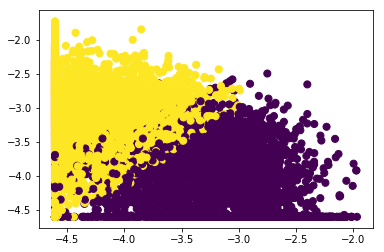

In [28]:
# QUESTION 4 (b)

print('====== Log Transformation using r = 3 ======')
nmf = NMF(n_components=3, random_state=42)
NMF_transformed_tfidf = nmf.fit_transform(vectors)
log_transform = np.log(0.01 + NMF_transformed_tfidf)
print(log_transform.shape)
km = KMeans(n_clusters=2, init='k-means++', max_iter=100, n_init=1)
km.fit(log_transform)
print("Metrics for r = 3")
print('Contingency Matrix:')
print(contingency_matrix(target_data, km.labels_, eps=None, sparse=False))
print("Homogeneity: %0.3f" % metrics.homogeneity_score(target_data, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(target_data, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(target_data, km.labels_))
print("Adjusted Rand-Index: %.3f"% metrics.adjusted_rand_score(target_data, km.labels_))
print("Adjusted Mutual-Index: %.3f"% metrics.adjusted_mutual_info_score(target_data, km.labels_))
print()
y_kmeans_log = km.fit_predict(log_transform)
plt.scatter(log_transform[:, 0], log_transform[:, 1], c=y_kmeans_log, s=50, cmap='viridis')
plt.show()

======== Normalizing and then taking log transform of NMF reduced data ========
(7882, 3)
Metrics for r = 3
Contingency Matrix:
[[ 988 2915]
 [3870  109]]
Homogeneity: 0.484
Completeness: 0.485
V-measure: 0.485
Adjusted Rand-Index: 0.591
Adjusted Mutual-Index: 0.484



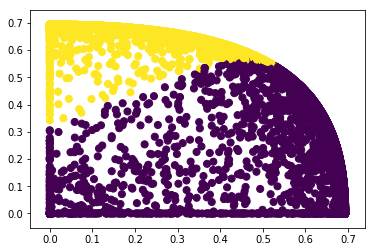



======= Taking log transform and then normalizing of NMF reduced data ======
Metrics for r = 3
Contingency Matrix:
[[ 988 2915]
 [3870  109]]
Homogeneity: 0.484
Completeness: 0.485
V-measure: 0.484
Adjusted Rand-Index: 0.590
Adjusted Mutual-Index: 0.484



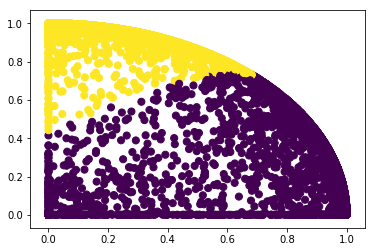

In [32]:
# QUESTION 4 (b)

print('======== Normalizing and then taking log transform of NMF reduced data ========')
nmf = NMF(n_components=3, random_state=42)
NMF_transformed_tfidf = nmf.fit_transform(vectors)
scaled_vectors = preprocessing.normalize(NMF_transformed_tfidf , norm='l2', axis=1, copy=True, return_norm=False)
log_transform = np.log1p(scaled_vectors)
print(log_transform.shape)
km = KMeans(n_clusters=2, init='k-means++', max_iter=100, n_init=1)
km.fit(log_transform)
print("Metrics for r = 3")
print('Contingency Matrix:')
print(contingency_matrix(target_data, a.labels_, eps=None, sparse=False))
print("Homogeneity: %0.3f" % metrics.homogeneity_score(target_data, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(target_data, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(target_data, km.labels_))
print("Adjusted Rand-Index: %.3f"% metrics.adjusted_rand_score(target_data, km.labels_))
print("Adjusted Mutual-Index: %.3f"% metrics.adjusted_mutual_info_score(target_data, km.labels_))
print()
y_kmeans_scaled1 = km.fit_predict(log_transform)
plt.scatter(log_transform[:, 0], log_transform[:, 1], c=y_kmeans_scaled1, s=50, cmap='viridis')
plt.show()

print()
print()

print('======= Taking log transform and then normalizing of NMF reduced data ======')
nmf = NMF(n_components=3, random_state=42)
NMF_transformed_tfidf = nmf.fit_transform(vectors)
log_transform = np.log1p(NMF_transformed_tfidf)
scaled_vectors = preprocessing.normalize(log_transform, norm='l2', axis=1, copy=True, return_norm=False)
km = KMeans(n_clusters=2, init='k-means++', max_iter=100, n_init=1)
km.fit(scaled_vectors)
print("Metrics for r = 3")
print('Contingency Matrix:')
print(contingency_matrix(target_data, a.labels_, eps=None, sparse=False))
print("Homogeneity: %0.3f" % metrics.homogeneity_score(target_data, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(target_data, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(target_data, km.labels_))
print("Adjusted Rand-Index: %.3f"% metrics.adjusted_rand_score(target_data, km.labels_))
print("Adjusted Mutual-Index: %.3f"% metrics.adjusted_mutual_info_score(target_data, km.labels_))
print()
y_kmeans_scaled2 = km.fit_predict(scaled_vectors)
plt.scatter(scaled_vectors[:, 0], scaled_vectors[:, 1], c=y_kmeans_scaled2, s=50, cmap='viridis')
plt.show()